
# Project: Investigate a Dataset - [No-Show-Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset is a collection of medical appointments in Brazil with over 100,000 observations and 14 variables. This dataset has information containing patients'general and medical information. The focus of this project is to spot patients that refuded to show up for their appointments despite booking an appointment and booking reservations.
The fearures of the dataset are as follows:

>1- PatientId: Patient's Identification.

>2- AppointmentID: Appointment identification.

>3- Gender: Patient's gender.

>4- ScheduledDay: Scheduled appointment day.

>5- AppointmentDay: The day the patient should show up for his appointment.

>6- Age: Patient age.

>7- Neighbourhood: appointment venue.

>8- Scholarship: Whether the patient is enrolled in Brasilian welfare program or not.

>9- Hipertension: Whether the patient suffers from Hipertension or not.

>10- Diabetes: Whether the patient suffers from Diabetes or not.

>11- Alcoholism: Whether the patient suffers from Alcoholism or not.

>12- Handcap: indicator of the number of handicaps that the patient has.

>13- SMS_received: patient received SMS or not.

>14- No-show: if the patient showed up for the appointment or not.


### Research Questions
>  1 Percentage of patients diagnosed with illness and the percentage of the patients that have either sms or scholarship.

> 2 Effect of being ill on illness affect patients not showing up for their appointments.


In [7]:
# import the tools needed to inspect the data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np



<a id='wrangling'></a>
## Data Wrangling


>Data Loading and Cleaning for Analysis

In [8]:
# To load the no show appointments dataset and view rows and columns in the dataset 

no_show = pd.read_csv('noshowappointments-kagglev2-may-2016 (2).csv')
print(no_show.shape)
no_show.head()

(110527, 14)


PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [9]:
#Summary of the dataframe

no_show.info()

#The code above allows to print the summary of the data, it aids to view the breakdown of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
# Data types in each of the columns

# This function returns all the data types in the data.
no_show.dtypes


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [11]:
# Checking for duplicated records in the dataset
no_show.duplicated().sum()

#No duplicated values in the dataset.

0

In [12]:
# To view unique values in the dataset
no_show.nunique()




PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning
>  Cleaning of the data was done by following these steps:
   > 

For this data cleaning process, some labels have been discovered to have been spelt incorrectly, such spellis will be corrected. Also, the dataset is not expected to contain null values or duplicated contents.


In [13]:
# Changing the datatype for ScheduledDay & AppointmentDay => DateTime data type.

no_show['ScheduledDay'] = pd.to_datetime(no_show['ScheduledDay'])

no_show['AppointmentDay'] = pd.to_datetime(no_show['AppointmentDay'])

In [15]:
#Check the data type to confirm if the datetime datatype has been converted 

no_show.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [16]:
#Renaming wrongly spelt colums columns (Hipertension and Diabetes) 

no_show.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace = True)

In [17]:
#Confirmation to see if misspelt columns have been corrected

no_show.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hypertension       Diabetes     Alcoholism       Handicap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

<a id='eda'></a>

>The Dataset has been examined, detected outliers will be removed for data cleaning.

There is abscence of duplicated rows in the dataset, however, the maximum age in the dataset is 115 which is considered an outlier, since the value of the 75th percentile is 55.

The data also has -1 and 0 as minimum age. This has to be removed as there is no age as 0 or -1 age.

The q3 + 1.5iqr formular will be used to removve the outliers.

In [18]:
percentile_75th = no_show['Age'].quantile(0.75)
percentile_25th = no_show['Age'].quantile(0.25)

iqr = percentile_75th - percentile_25th
iqr

outlier = percentile_75th + (1.5 * iqr)
outlier

110.5

As a result of the result of the above calculations, all ages < than 110.5 will be considered an outlier 


In [19]:
# Now Lets remove the outlier from the Age column in the dataset

no_show.query('Age < 110.5' , inplace = True)

In [20]:
no_show.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105220e+05   1.105220e+05  110522.000000  110522.000000   
mean   1.474950e+14   5.675305e+06      37.085350       0.098270   
std    2.560934e+14   7.129607e+04      23.104785       0.297681   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172457e+12   5.640285e+06      18.000000       0.000000   
50%    3.172723e+13   5.680570e+06      37.000000       0.000000   
75%    9.439277e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     102.000000       1.000000   

        Hypertension       Diabetes     Alcoholism       Handicap  \
count  110522.000000  110522.000000  110522.000000  110522.000000   
mean        0.197246       0.071868       0.030401       0.022213   
std         0.397921       0.258270       0.171689       0.161439   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110522.000000  
mean        0.321031  
std         0.466875  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [21]:
#Renaming the No-show column and replace with No_show

no_show.rename(columns={'No-show': 'No_show'}, inplace=True)



In [22]:
no_show.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No_show                        object
dtype: object

In [23]:
#Conversion of all column names to lower case

no_show.rename(columns = lambda x:x.strip().lower() , inplace = True)

Drop function will be used to drop features that are outrageous or inconsistent. Dropping outrageous or inconsistent function an integral part of the cleaning process , the goal is to drop the features for a clean data and for the visualization process to make the data readable.


In [24]:
#Dropping outrageous features.

no_show.drop(['patientid','appointmentid','neighbourhood'], axis = 1, inplace =True)

In [25]:
no_show.head() #To view the details of the dataset.
# The data is now clean and ready to be used

gender              scheduledday            appointmentday  age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   62   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   56   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   62   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00    8   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   56   

   scholarship  hypertension  diabetes  alcoholism  handicap  sms_received  \
0            0             1         0           0         0             0   
1            0             0         0           0         0             0   
2            0             0         0           0         0             0   
3            0             0         0           0         0             0   
4            0             1         1           0         0             0   

  no_show  
0      No  
1      No  
2      No  
3      No  
4      No

<a id='eda'></a>
## Exploratory Data Analysis





This part answers 3 important questions based n the dataset.
1 Percentage of patients diagnosed with illness and the percentage of the patients that have either sms or scholarship.

2 Effect of being ill on patients not showing up for their appointments.

3 Percentage of patients that missed their appointment

To roperly understand the dataset, our findings will be visualized


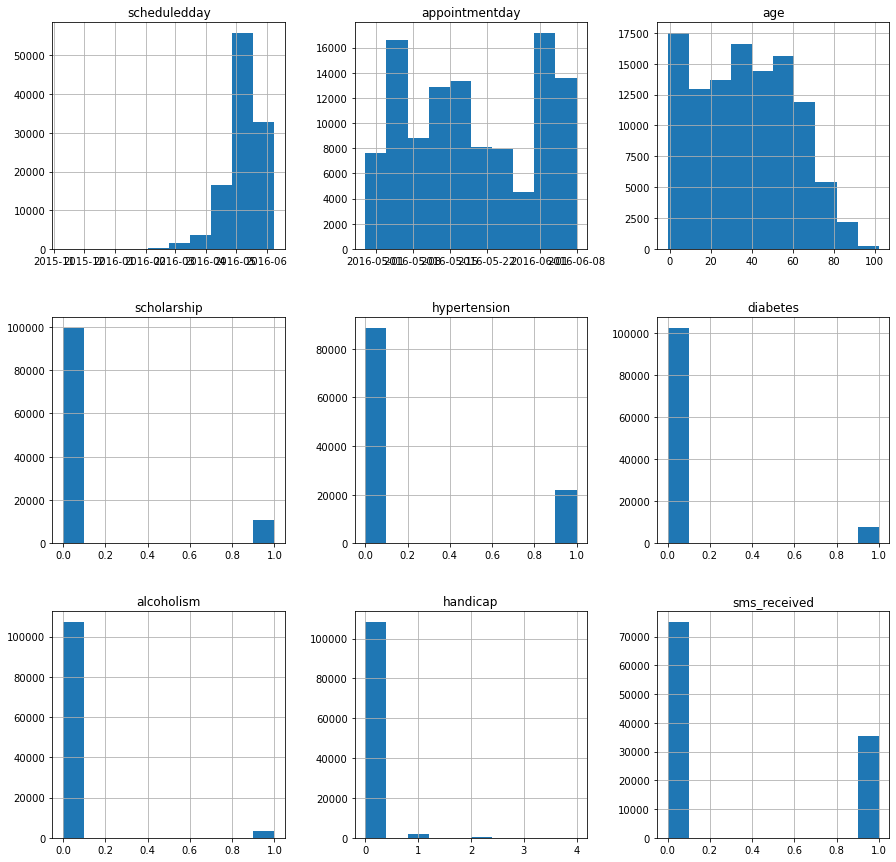

In [26]:
#Visualization of the dataset

no_show.hist(figsize=(15,15));



According to the Histogram above, majority of the patients are within the ages of 0 to 70

### Research Question 1  (Percentage of patients diagnosed with illness and the percentage of the patients that have either sms or scholarship.)

This examines the percentage of the patients that have been diagnosed with each of these ailments and the percentage of the patients that have either sms or scholarship. Thw input fnction is used below to Input the columns within the above analysis to get the desired result.

In [27]:
def Check(arg):
    hcp = round(no_show[arg].value_counts(normalize=True)*100)
    if arg == 'sms_received':
        print('{}% of the patients received SMS'.format(hcp[1]))
    elif arg == 'handicap':
        print('{}% of the patients are not handicaped'.format(hcp[0]))
    elif arg == 'scholarship':
        print('{}% of the patients have scholarship'.format(hcp[1]))
    else:   
        print('{}% of the patients are suffering from {}'.format(hcp[1],arg))
    

In [28]:
#Features to be checked will be inputed, ailment or sms_received or scholarship

arg = input('Input the illness or sms_received or scholarship:')
Check(arg)

Input the illness or sms_received or scholarship:scholarship
10.0% of the patients have scholarship


In [29]:
#Masking the dataset by the patients that showed up for their appointments and those who did not

show_up = no_show[no_show['no_show'] == 'No']
no_show_up = no_show[no_show['no_show'] =='Yes']

In [30]:
pd.DataFrame(no_show.groupby('no_show').mean()['age'])

age
no_show           
No       37.788314
Yes      34.306820

>The result above shows the average age of patients that either showed up for their appointment or not.

>- The average age of patients that showed up for their appointment is 34years
>- The average age of patients that did not showed up for their appointment is 38years

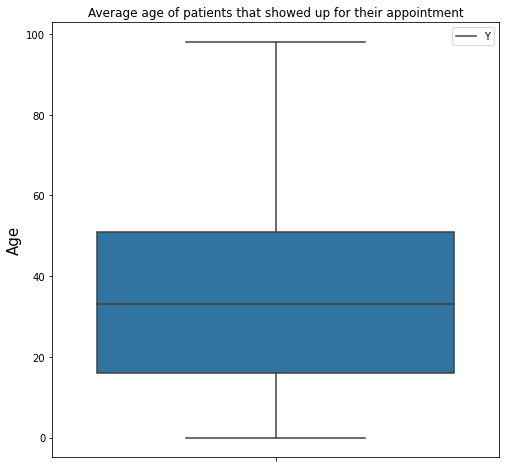

In [31]:
# Average age group of patients in percentage who showed up or not for their appointment

plt.figure(figsize=(8, 8))

sns.boxplot(y=no_show.age[no_show.no_show == 'Yes']);

plt.title('Average age of patients that showed up for their appointment');
plt.ylabel('Age', fontsize = 15);
plt.legend('Y')

The average age of patients that showed up for their appointment is 34years


In [32]:
# The plot below indicates the average age group of patients in percentage who showed up or did not show up for their appointment
plt.figure(figsize=(8, 8))

sns.boxplot(y=no_show.age[no_show.no_show == 'No']);

plt.title('Average age of patients that did not show up for their appointment');
plt.ylabel('Age', fontsize = 15);
plt.legend('N')

The average age of patients that did not showed up for their appointment is 38years

The plots above indicates the average age group of patients in percentage who showed up or did not show up for their appointments.



It is safe to say that age is not a factor that determines patients showing up for their appointments because the average age of those who turned up for their appointment and those who did not are very close.


### Research Question 2  (Effect of being ill on illness affect patients not showing up for their appointments.)

To enable accurate answering of the above question, the ailments will be treated individually then the data will be aggregated according to the ailment category by using the groupby() function.

The result will also be vizualized.

In [ ]:
#Check the percentage of patience diagnosed with hypertention who showed up or did not show up for their appointments.

perc = pd.DataFrame(no_show.groupby('hypertension')['no_show'].value_counts(normalize=True))
pd.DataFrame(no_show.groupby('hypertension')['no_show'].value_counts(normalize=True))



The percentage of the patients that have hypertension and showed up is more than the percentage of those who don't have hypertension and showed up by about 2.6%.


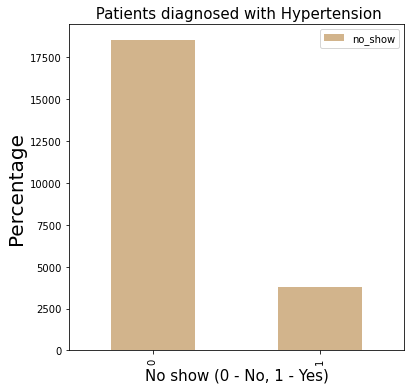

In [35]:
#Plotting results on a graph
no_show_up.groupby('hypertension')['no_show'].count().plot(kind = 'bar', color ='tan', figsize= (6,6));
plt.legend()
plt.title(' Patients diagnosed with Hypertension', fontweight=15, fontsize=15)
plt.ylabel('Percentage', color = "black" , fontweight=15, fontsize=20)
plt.xlabel('No show (0 - No, 1 - Yes)',fontweight=15, fontsize=15);
plt.show()

In [34]:
#Percentage of patient diagnosed with diabetes who showed up or not for their appointments

pd.DataFrame(no_show.groupby('diabetes')['no_show'].value_counts(normalize=True))




no_show
diabetes no_show          
0        No       0.796391
         Yes      0.203609
1        No       0.819967
         Yes      0.180033

The percentage of the patients that have diabetes and showed up is more than the percentage of those who don't have diabetes and showed up by about 2.3%.


In [36]:
#Plotting results on a graph

no_show_up.groupby('diabetes')['no_show'].count().plot(kind = 'bar', color ='grey', figsize= (6,6));
plt.legend()
plt.title(' Patients diagnosed with Diabetes', fontweight=15, fontsize=20)
plt.ylabel('Percentage', color = "black" , fontweight=15, fontsize=15)
plt.xlabel('No show (0 - No, 1 - Yes)',fontweight=15, fontsize=20);
plt.show()

In [37]:
#Percentage of patience diagnosed with alcoholism who showed up or not show up for their appointment

pd.DataFrame(no_show.groupby('alcoholism')['no_show'].value_counts(normalize=True))




no_show
alcoholism no_show          
0          No       0.798072
           Yes      0.201928
1          No       0.798512
           Yes      0.201488

The percentage of the patients that have alcoholism and showed up and the percentage of those who don't have alcoholism and showed up is almost the same


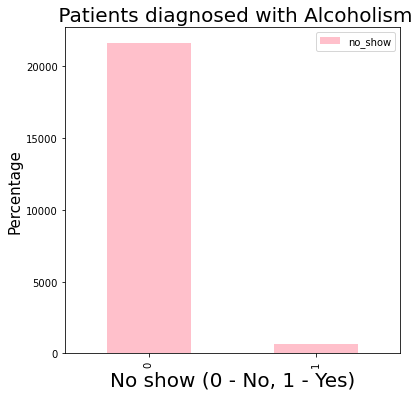

In [38]:
#plot the result on a graph
no_show_up.groupby('alcoholism')['no_show'].count().plot(kind = 'bar', color ='pink', figsize= (6,6));
plt.title(' Patients diagnosed with Alcoholism', fontweight=15, fontsize=20)
plt.legend()
plt.ylabel('Percentage', color = "black" , fontweight=15, fontsize=15)
plt.xlabel('No show (0 - No, 1 - Yes)',fontweight=15, fontsize=20);
plt.show()

The charts indicate that illnesses does not deter patients from showing for their appointments, the percentage of patient who have been diagnosed with one illness or the other and have showed up is more than those who do not have an ailment.


<a id='conclusions'></a>
## Conclusions

> Conclusivesly checks reveals that 32.0% of the patients received SMS, 10.0% of the patients have scholarship, 98.0% of the patients are not handicaped , 20.0% of the patients are suffering from hypertension and 7.0% of the patients are suffering from diabetes.

> The percentage of patients that showed up for the appointment is about 79.81%.

> The percentage of the patients that have hypertension and showed up is more than the percentage of those who don't have hypertension and showed up by about 2.6%.

> The percentage of the patients that have diabetes and showed up is more than the percentage of those who don't have diabetes and showed up by about 2.3%. 

> The percentage of the patients that have alcoholism and showed up is approximately the same as the percentage of those who don't have alcoholism and showed up.

<a id='conclusions'></a>
## Limitations

> The dataset does not contain enough information or data to draw conclusions. Instances include: inability to ascertain when the patiets got the sms, we are unable to deduce if the sms was gotten before or after the appointment date.

> Sending sms may be a good option to remind noshowers of their appointment day.

<a id='conclusions'></a>
## Resources
> w3schools.com/python/trypython.asp?filename=demo_matplotlib_pie3



> geeksforgeeks.org/different-ways-to-create-pandas-dataframe/


> Kaggle - Noshowdata Appointments

> Top 50 matplotlib Visualizations – The Master Plots (with full python code) by Selva Prabhakaran
